In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
df = pd.read_csv("/content/sample_user_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,785078151568671210,1,20170427,1493331229,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,142102319075727733,1,20170427,1493316667,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1015855318272495035,1,20170427,1493295075,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,7452646484470618802,1,20170427,1493299324,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,1985244892543433393,3,20170427,1493309497,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


In [9]:
df.shape

(464439, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fullVisitorId            464439 non-null  object 
 1   VisitNumber              464439 non-null  int64  
 2   Date                     464439 non-null  int64  
 3   VisitStartTime           464439 non-null  int64  
 4   bounces                  232178 non-null  float64
 5   pageviews                464387 non-null  float64
 6   timeOnSite               231612 non-null  float64
 7   totalTransactionRevenue  6308 non-null    float64
 8   transactions             6308 non-null    float64
 9   source                   464439 non-null  object 
 10  medium                   464439 non-null  object 
 11  campaign                 464439 non-null  object 
 12  deviceCategory           464439 non-null  object 
 13  operatingSystem          464439 non-null  object 
 14  mobi

In [11]:
df.describe()

,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions
count,464439.000000,4.644390e+05,4.644390e+05,232178.0,464387.000000,231612.000000,6.308000e+03,6308.000000
mean,2.334040,2.017042e+07,1.492485e+09,1.0,3.772011,279.921610,1.617053e+08,1.046449
std,9.879354,2.006430e+02,5.279611e+06,0.0,6.403579,492.292307,9.034953e+08,0.531457
min,1.000000,2.017010e+07,1.483258e+09,1.0,1.000000,1.000000,2.200000e+06,1.000000
25%,1.000000,2.017022e+07,1.487899e+09,1.0,1.000000,33.000000,2.899000e+07,1.000000
50%,1.000000,2.017042e+07,1.492441e+09,1.0,1.000000,94.000000,5.297500e+07,1.000000
75%,1.000000,2.017061e+07,1.497075e+09,1.0,4.000000,290.000000,1.119375e+08,1.000000
max,395.000000,2.017073e+07,1.501571e+09,1.0,466.000000,12136.000000,4.708206e+10,25.000000


**Data Cleaning**

1. fullVisitorId : We can assume that the visitor ID information does not impact the transactions, and hence this column can be dropped.

In [12]:
df = df.drop('fullVisitorId', axis=1)
df.head()

,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,1,20170427,1493331229,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,1,20170427,1493316667,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1,20170427,1493295075,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,1,20170427,1493299324,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,3,20170427,1493309497,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


2. VisitNumber : The session(visit) number for individual user.

In [13]:
df['VisitNumber'].value_counts()

1      353256
2       51792
3       19760
4       10573
5        6417
        ...  
307         1
364         1
363         1
362         1
353         1
Name: VisitNumber, Length: 383, dtype: int64

3. Date : The date of the session is in YYYYMMDD format. The date info again is repeated in the next column (timestamp), hence the date info is duplicated and this column can be dropped.

In [14]:
df = df.drop('Date', axis=1)
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,1,1493331229,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,1,1493316667,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1,1493295075,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,1,1493299324,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,3,1493309497,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


4. VisitStartTime : The timestamp (expressed as POSIX time). We extract Time from VisitStartTime timestamp.

In [15]:
df['VisitStartTime']=pd.to_datetime(df['VisitStartTime'],unit='s')
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,1,2017-04-27 22:13:49,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,1,2017-04-27 18:11:07,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1,2017-04-27 12:11:15,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,1,2017-04-27 13:22:04,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,3,2017-04-27 16:11:37,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


5. bounces : For a bounced session, the value is 1, otherwise it is null. We replace all NaN values in this column with 0.

In [16]:
df['bounces'].fillna(0,inplace=True)
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,1,2017-04-27 22:13:49,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,1,2017-04-27 18:11:07,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1,2017-04-27 12:11:15,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,1,2017-04-27 13:22:04,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,3,2017-04-27 16:11:37,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


In [17]:
df['bounces'].value_counts()

0.0    232261
1.0    232178
Name: bounces, dtype: int64

6. pageviews : Total number of pageviews within the session. If a user has no page views,there will be no transaction. Hence we replace the NaN values in this column with 0.

In [18]:
df['pageviews'].fillna(0,inplace=True)
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,1,2017-04-27 22:13:49,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,1,2017-04-27 18:11:07,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1,2017-04-27 12:11:15,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,1,2017-04-27 13:22:04,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,3,2017-04-27 16:11:37,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


7. timeOnSite : Total time of the session expressed in seconds.If a user has no total time on site,there will be no transaction. Hence we replace the NaN values in this column with 0.

In [19]:
df['timeOnSite'].fillna(0,inplace=True)
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,1,2017-04-27 22:13:49,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,1,2017-04-27 18:11:07,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1,2017-04-27 12:11:15,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,1,2017-04-27 13:22:04,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,3,2017-04-27 16:11:37,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


8. totalTransactionRevenue : Total transaction revenue, expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).
Here we note that 'totalTransactionRevenue' and 'totals_transactions' are related columns. If 'transactions' has null value, then the corresponding 'totalTransactionRevenue' column should also have a null value, and vice-versa.

We therefore need to check these two columns for the following conditions:

If there are any 'transactions' null values where the corresponding 'totalTransactionRevenue' value is not null.

If there are any 'totalTransactionRevenue' null values where the corresponding 'transactions' value is not null.

In [20]:
df['diff'] = df.totalTransactionRevenue.eq(pd.to_numeric(df.transactions, errors='coerce'))

In [21]:
df['diff'].value_counts()

False    464439
Name: diff, dtype: int64

If a user has no transaction revenue, there will be no transaction. We replace all NaN values in this column with 0

In [22]:
df['totalTransactionRevenue'].value_counts()

23990000.0    49
22990000.0    48
25990000.0    46
21990000.0    44
24990000.0    41
              ..
24720000.0     1
98870000.0     1
61790000.0     1
98830000.0     1
24150000.0     1
Name: totalTransactionRevenue, Length: 3695, dtype: int64

In [23]:
df['totalTransactionRevenue'].fillna(0,inplace=True)
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping,diff
0,1,2017-04-27 22:13:49,1.0,1.0,0.0,0.0,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search,False
1,1,2017-04-27 18:11:07,1.0,1.0,0.0,0.0,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,False
2,1,2017-04-27 12:11:15,1.0,1.0,0.0,0.0,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,False
3,1,2017-04-27 13:22:04,1.0,1.0,0.0,0.0,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,False
4,3,2017-04-27 16:11:37,1.0,1.0,0.0,0.0,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,False


9. transactions: Total number of ecommerce transactions within the session.
The missing values for transactions we can consider as 0 (no transaction), hence we replace all NaN values in this column with 0

In [24]:
df['transactions'].fillna(0,inplace=True)
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping,diff
0,1,2017-04-27 22:13:49,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search,False
1,1,2017-04-27 18:11:07,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,False
2,1,2017-04-27 12:11:15,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,False
3,1,2017-04-27 13:22:04,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,False
4,3,2017-04-27 16:11:37,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,False


10. source: The source of the traffic source. Could be the name of the search engine, the referring hostname, or a value of the utm_source URL parameter.

In [25]:
df['source'].value_counts()

(direct)                187241
google                  179591
youtube.com              50205
analytics.google.com     10859
Partners                  9715
                         ...  
google.bg                    1
us.wow.com                   1
images.google.lk             1
basecamp.com                 1
google.no                    1
Name: source, Length: 223, dtype: int64

11. medium : The medium of the traffic source. Could be "organic", "cpc", "referral", or the value of the utm_medium URL parameter.

In [26]:
df['medium'].value_counts()

(none)       187239
organic      173206
referral      81701
affiliate      9708
cpc            9262
cpm            3211
(not set)       112
Name: medium, dtype: int64

12. campaign: The campaign value. Usually set by the utm_campaign URL parameter.

In [27]:
df['campaign'].value_counts()

(not set)                             446332
Data Share Promo                        9708
AW - Accessories                        5318
AW - Dynamic Search Ads Whole Site      3045
AW - Apparel                              32
AW - Electronics                           3
Data Share                                 1
Name: campaign, dtype: int64

13. deviceCategory: The type of device (Mobile, Tablet, Desktop).

In [28]:
df['deviceCategory'].value_counts()

desktop    312851
mobile     133180
tablet      18408
Name: deviceCategory, dtype: int64

14. operatingSystem: 	The operating system of the device (e.g., "Macintosh" or "Windows").

In [29]:
df['operatingSystem'].value_counts()

Windows          171189
Macintosh        107280
Android           78213
iOS               69077
Linux             19343
Chrome OS         15474
(not set)          2797
Windows Phone       623
Samsung             186
BlackBerry          112
Nintendo WiiU        35
Xbox                 34
Nintendo Wii         33
Firefox OS           32
FreeBSD               7
OpenBSD               2
NTT DoCoMo            1
Nintendo 3DS          1
Name: operatingSystem, dtype: int64

15. mobileDeviceModel: The mobile device model. 

In [30]:
df['mobileDeviceModel'].value_counts()

not available in demo dataset    464439
Name: mobileDeviceModel, dtype: int64

In [31]:
df = df.drop('mobileDeviceModel', axis=1)
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,diff
0,1,2017-04-27 22:13:49,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,Mountain View,Organic Search,False
1,1,2017-04-27 18:11:07,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Organic Search,False
2,1,2017-04-27 12:11:15,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,False
3,1,2017-04-27 13:22:04,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,False
4,3,2017-04-27 16:11:37,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,False


16: city: Users' city, derived from their IP addresses or Geographical IDs.

In [32]:
df['city'].value_counts()

not available in demo dataset    268179
Mountain View                     21560
(not set)                         16313
New York                          14582
San Francisco                     11455
                                  ...  
Thornton                              5
Boise                                 3
Pryor                                 3
Bozeman                               3
Saratoga                              3
Name: city, Length: 436, dtype: int64

17. ChannelGrouping: The Default Channel Group associated with an end user's session for this View. 

In [33]:
df['ChannelGrouping'].value_counts()

Organic Search    232876
Direct             85993
Social             59915
Referral           58390
Paid Search        14177
Affiliates          9708
Display             3265
(Other)              114
Organic S              1
Name: ChannelGrouping, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VisitNumber              464439 non-null  int64         
 1   VisitStartTime           464439 non-null  datetime64[ns]
 2   bounces                  464439 non-null  float64       
 3   pageviews                464439 non-null  float64       
 4   timeOnSite               464439 non-null  float64       
 5   totalTransactionRevenue  464439 non-null  float64       
 6   transactions             464439 non-null  float64       
 7   source                   464439 non-null  object        
 8   medium                   464439 non-null  object        
 9   campaign                 464439 non-null  object        
 10  deviceCategory           464439 non-null  object        
 11  operatingSystem          464439 non-null  object        
 12  city            

In [35]:
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,diff
0,1,2017-04-27 22:13:49,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,Mountain View,Organic Search,False
1,1,2017-04-27 18:11:07,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Organic Search,False
2,1,2017-04-27 12:11:15,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,False
3,1,2017-04-27 13:22:04,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,False
4,3,2017-04-27 16:11:37,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,False


**Problem Statement**: To predict if the new visitor will transact or not. 

We therefore create a new target variable column- 'transact', which takes the value 1 for a transaction and 0 for no transaction.

In [36]:
df['transact'] = np.where(df['transactions']  == 0, '0','1')
df['transact'] = df['transact'].astype('str')

In [37]:
df['TransactionRevenue'] = df['totalTransactionRevenue'] / 1000000

In [38]:
df.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,diff,transact,TransactionRevenue
0,1,2017-04-27 22:13:49,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,Mountain View,Organic Search,False,0,0.0
1,1,2017-04-27 18:11:07,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Organic Search,False,0,0.0
2,1,2017-04-27 12:11:15,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,False,0,0.0
3,1,2017-04-27 13:22:04,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,False,0,0.0
4,3,2017-04-27 16:11:37,1.0,1.0,0.0,0.0,0.0,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,False,0,0.0


In [39]:
df.describe()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,TransactionRevenue
count,464439.000000,464439.000000,464439.000000,464439.000000,4.644390e+05,464439.000000,464439.000000
mean,2.334040,0.499911,3.771589,139.594659,2.196278e+06,0.014213,2.196278
std,9.879354,0.500001,6.403345,374.763296,1.069374e+08,0.136039,106.937428
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,1.000000,1.000000,4.000000,94.000000,0.000000e+00,0.000000,0.000000
max,395.000000,1.000000,466.000000,12136.000000,4.708206e+10,25.000000,47082.060000


EDA on the basis of cleaned dataset.

1. VisitNumber: Mean number of visits by an user is 2. Around 75% of users have visited only once. There are a number of outliers with values > 300, with the maximum value being 395.
 
Given below is the boxplot for the same.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


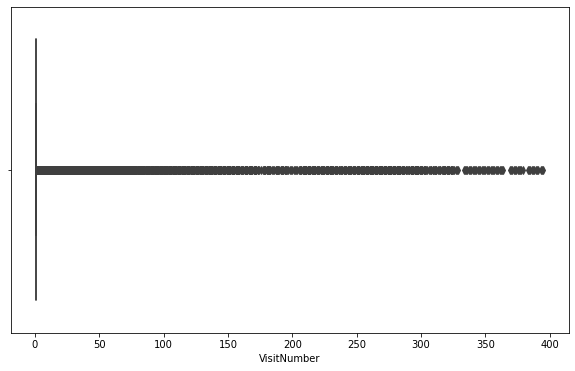

In [40]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.boxplot(df['VisitNumber']);

2. bounces: Around 75% of the visits are bounces.

3. pageviews: Mean number of total page views is close to 4. Around 75% of page views are close to 4. The number of outliers is 466. 

Given below is the is the number of transactions against page views.

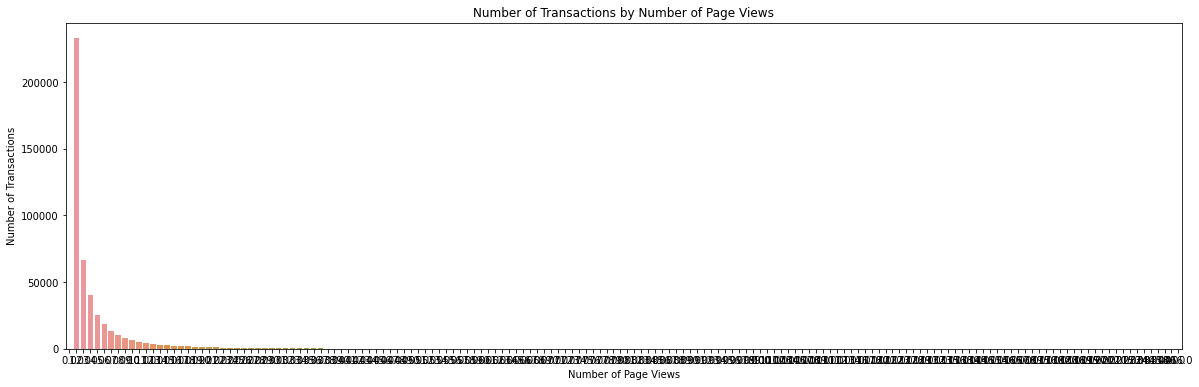

In [41]:
plt.figure(figsize=(20,6))
sns.countplot(x='pageviews', data=df)
plt.xlabel('Number of Page Views')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Number of Page Views');

4. timeOnSite: The average time spent by an user on the site is 139 seconds. The minimum time is 0 (for bounces), also there are some outliers with maximum values upto 12136 seconds.

5. TransactionRevenue: The average revenue per transaction is 2 currency units, however there is an extremely large value outlier as the maximum is 47082.

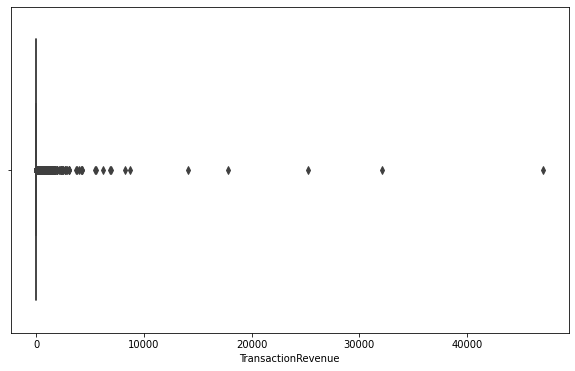

In [42]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.boxplot(x=df['TransactionRevenue']);

6. transaction: The average number of transactions per visit is quite low at 0.014205. More than 75% of visits do not result in any transaction. There are some outliers, where the maximum number of transactions per visit reaches 25.

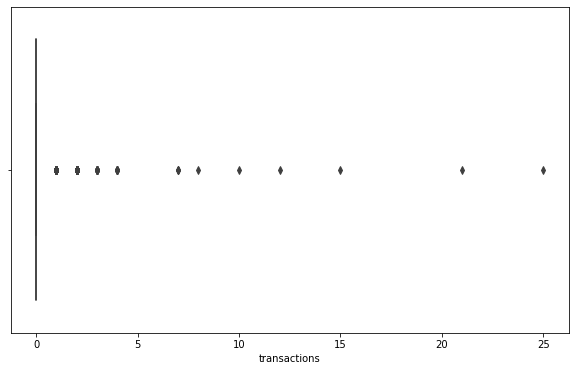

In [43]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.boxplot(x=df['transactions']);

7. transact: We can observe that 6308 visits have reulted in a transaction, whereas the remaining 458131 visits have yielded no transaction.

In [44]:
df['transact'].value_counts()

0    458131
1      6308
Name: transact, dtype: int64

In [45]:
base_colour = sns.color_palette()[0]


Transactions by category, operatingSystem, ChannelGrouping, medium

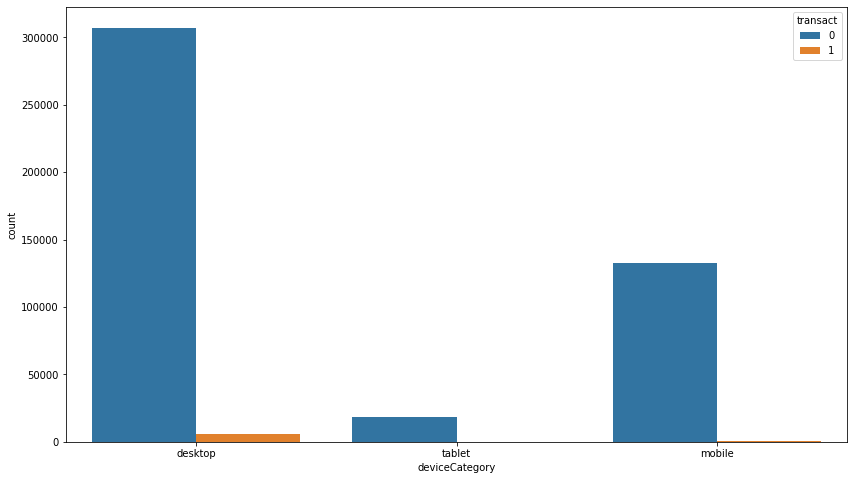

In [46]:
plt.figure(figsize=(14,8))
sns.countplot(x='deviceCategory', hue = 'transact', data=df);

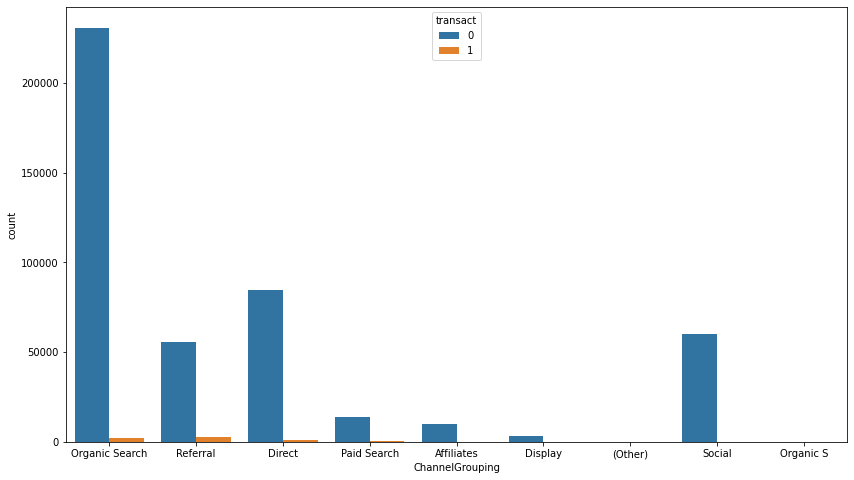

In [47]:
plt.figure(figsize=(14,8))
sns.countplot(x='ChannelGrouping', hue = 'transact', data=df);

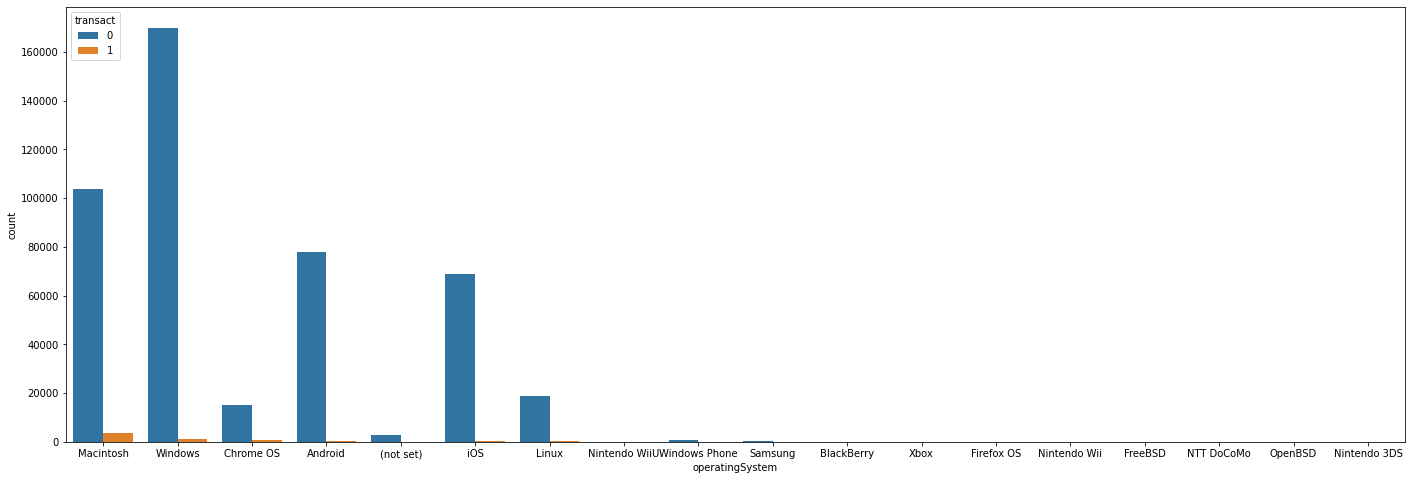

In [48]:
plt.figure(figsize=(24,8))
sns.countplot(x='operatingSystem', hue = 'transact', data=df);

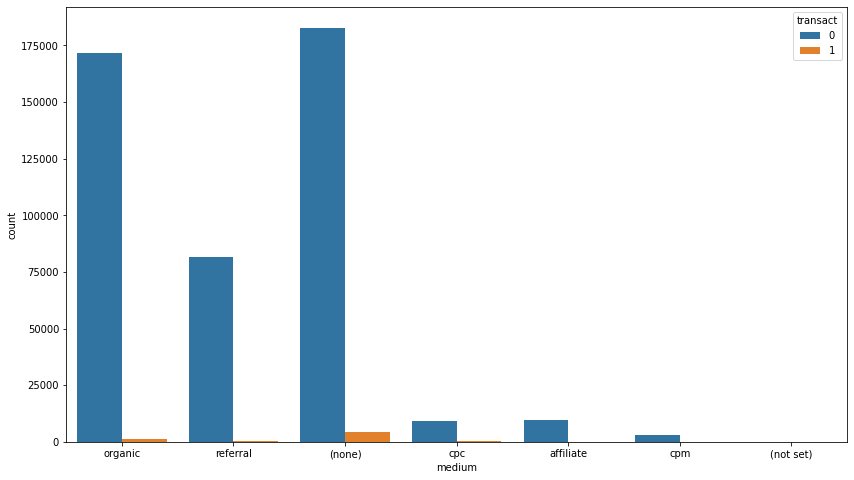

In [49]:
plt.figure(figsize=(14,8))
sns.countplot(x='medium', hue = 'transact', data=df);

Correlation Matrix showing relationship between all the features

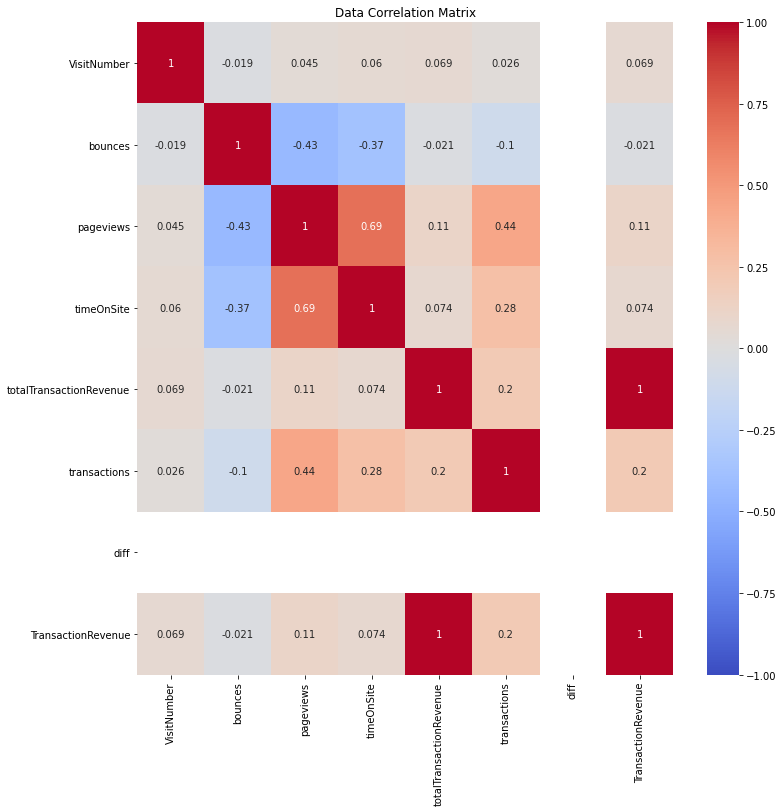

In [50]:
fig1 = plt.figure(figsize=(12,12));
df.corr()
plt.title('Data Correlation Matrix')
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True);